## Lavel 1 Project 3

#### 3) Music Recommendation:
#### Music recommender systems can suggest songs to users based on their listening patterns.

- Data Set Link:- http://www.kaggle.com/c/kkbox-music-recommendation-challenge/data
- Reffrance link:- https://youtu.be/CBCfOTePVPo

                                                                                        *Harsh Alkesh Pandya
                                                                                        *Batch Data Science April 2022

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import missingno as msno
import gc
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.metrics import roc_curve,roc_auc_score,classification_report,mean_squared_error,accuracy_score
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,BaggingClassifier,VotingClassifier,AdaBoostClassifier

In [2]:
import lightgbm as lgb
from sklearn.metrics import precision_recall_curve,roc_auc_score,classification_report,roc_curve
from tqdm import tqdm



# EDA 

In [3]:
from subprocess import check_output

train = pd.read_csv('C:\\Users\\Harsh Pandya\\OneDrive\\Desktop\\NDF\\train.csv')
test = pd.read_csv('C:\\Users\\Harsh Pandya\\OneDrive\\Desktop\\NDF\\test.csv')
songs = pd.read_csv('C:\\Users\\Harsh Pandya\\OneDrive\\Desktop\\NDF\\songs.csv')
members = pd.read_csv('C:\\Users\\Harsh Pandya\\OneDrive\\Desktop\\NDF\\members.csv')
sample = pd.read_csv('C:\\Users\\Harsh Pandya\\OneDrive\\Desktop\\NDF\\sample_submission.csv')

In [4]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [5]:
test.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


In [6]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [7]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [8]:
sample.head()
members.shape
train.info()
print("\n")
songs.info()
print("\n")
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 6 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   msno                object
 1   song_id             object
 2   source_system_tab   object
 3   source_screen_name  object
 4   source_type         object
 5   target              int64 
dtypes: int64(1), object(5)
memory usage: 337.7+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   song_id      object 
 1   song_length  int64  
 2   genre_ids    object 
 3   artist_name  object 
 4   composer     object 
 5   lyricist     object 
 6   language     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 122.6+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  -

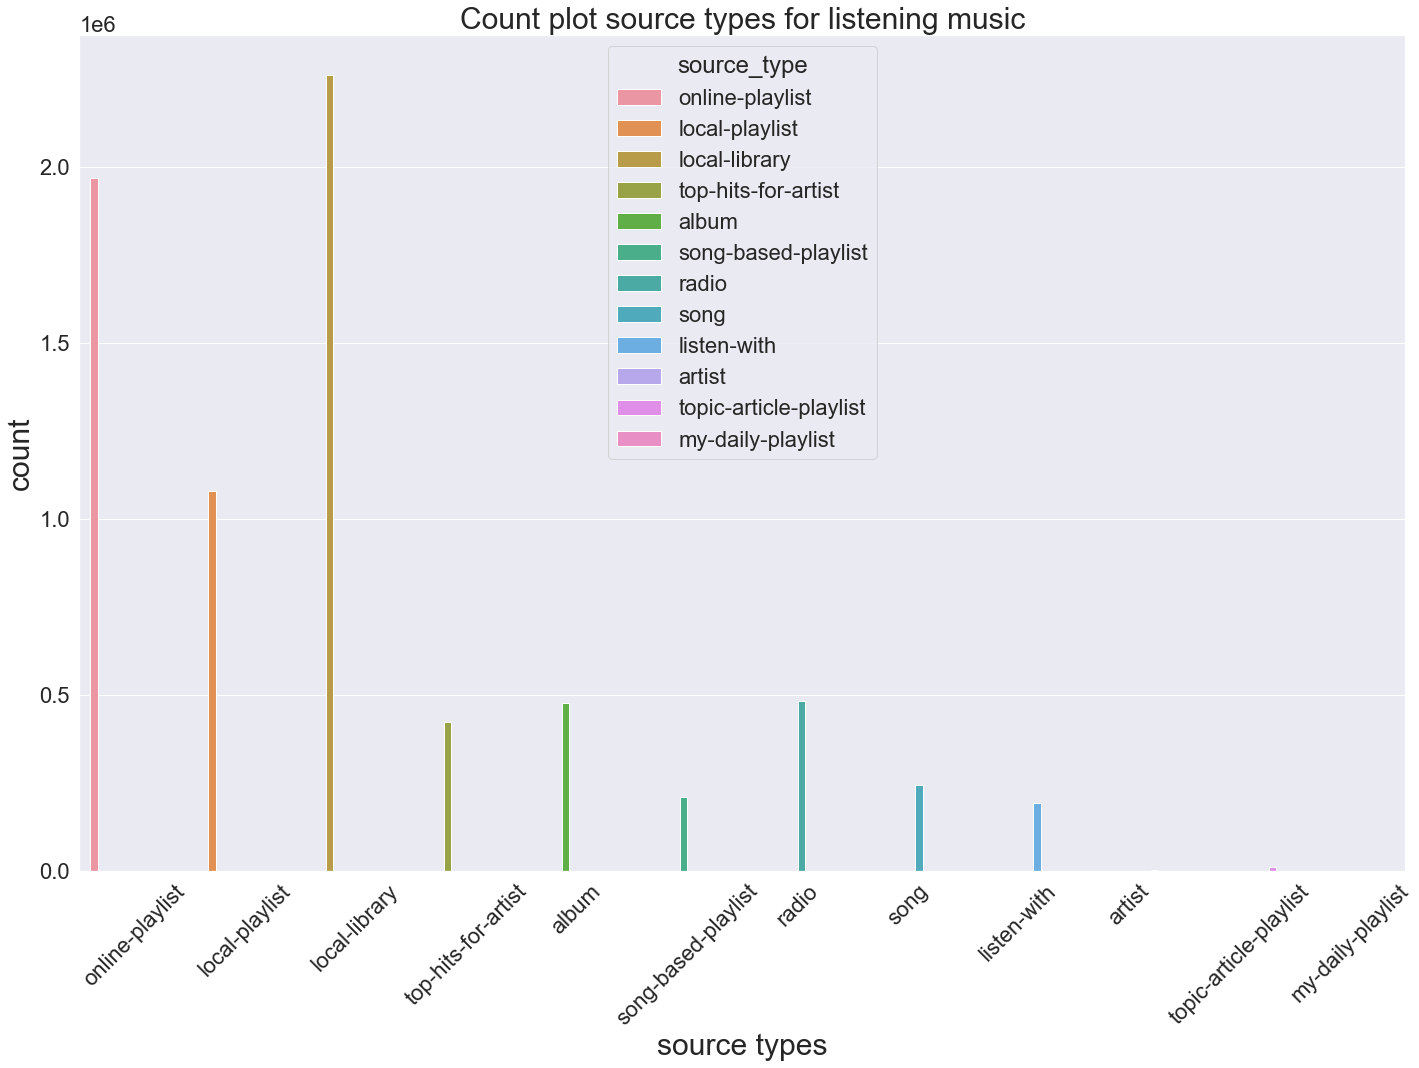

In [9]:
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.countplot(x='source_type',hue='source_type',data=train)
sns.set(style="darkgrid")
plt.xlabel('source types',fontsize=30)
plt.ylabel('count',fontsize=30)
plt.xticks(rotation='45')
plt.title('Count plot source types for listening music',fontsize=30)
plt.tight_layout()

#### First visualization we can see as if local library are more perffered than any other source types as well after that online playlist and local playlist and other features are showing less importance but can't say anything right now as we handn't deal with cleaning , imputing , stats 
#### But as far we are sure are answers for buliding this systems in revolving maximum issues around local library see next what other result say 

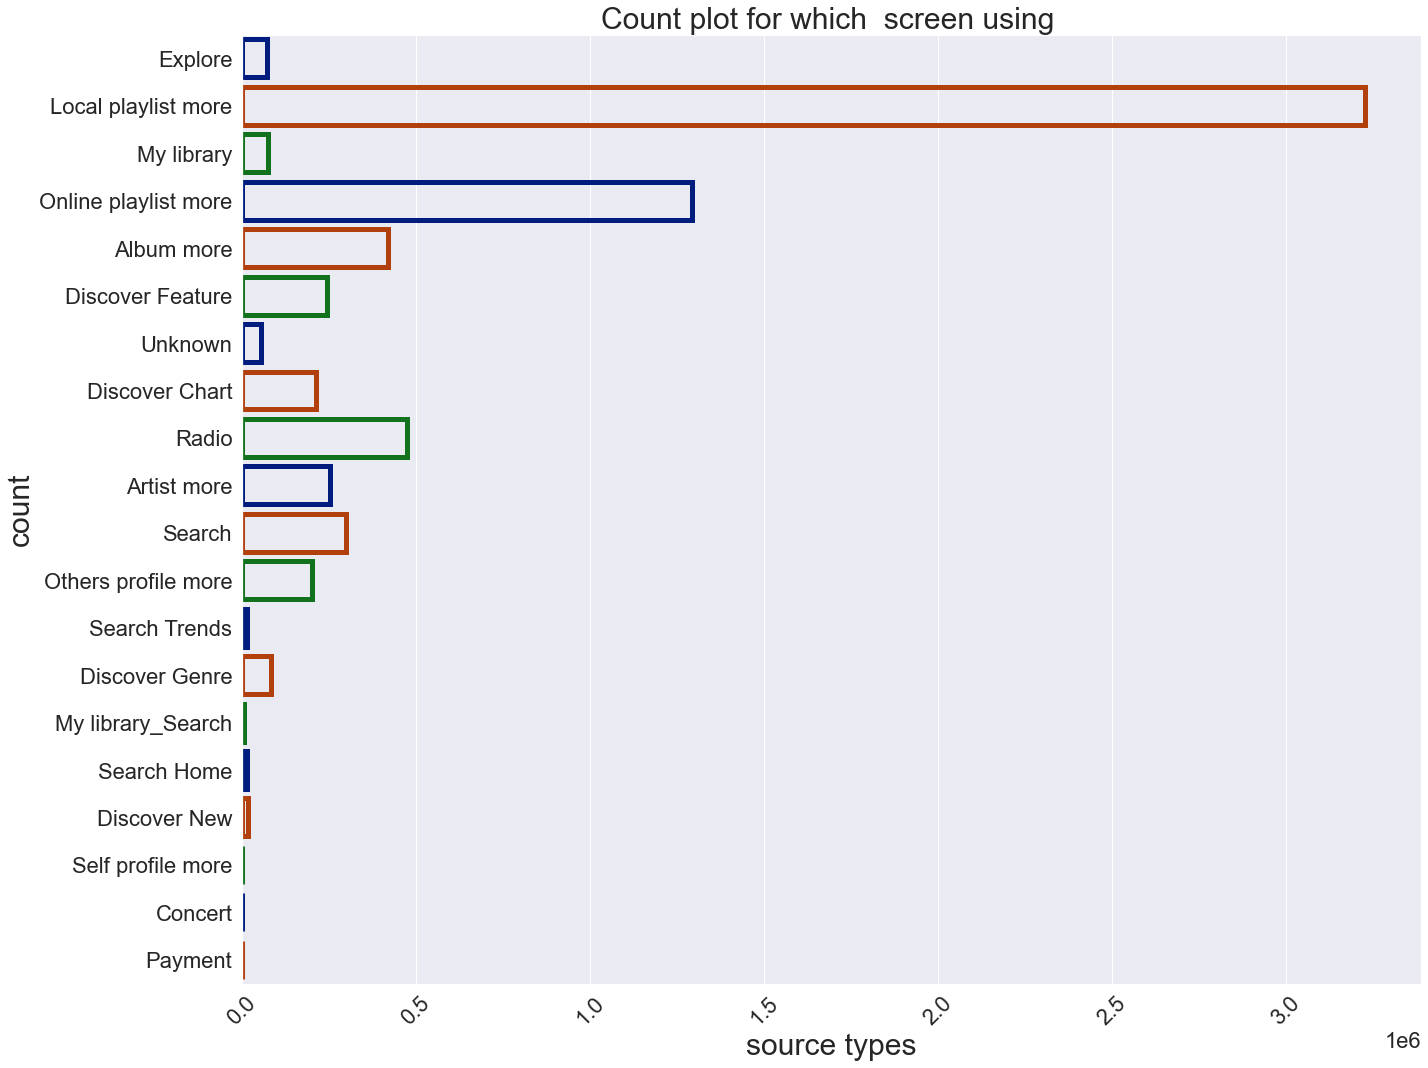

In [10]:
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.countplot(y='source_screen_name',data=train,facecolor=(0,0,0,0),linewidth=5,edgecolor=sns.color_palette('dark',3))
sns.set(style="darkgrid")
plt.xlabel('source types',fontsize=30)
plt.ylabel('count',fontsize=30)
plt.xticks(rotation='45')
plt.title('Count plot for which  screen using ',fontsize=30)
plt.tight_layout()

#### Second Visualization is telling us that most of the users are listenning local      
#### playlist more means the app which is provided by the company they are using them apart from this we can also see that after this most the users are coming back to the songs by online playlist sources 
#### Very less from the other different sources means are outliers , variance and std deviations are in 2 areas local libs and online playlist 


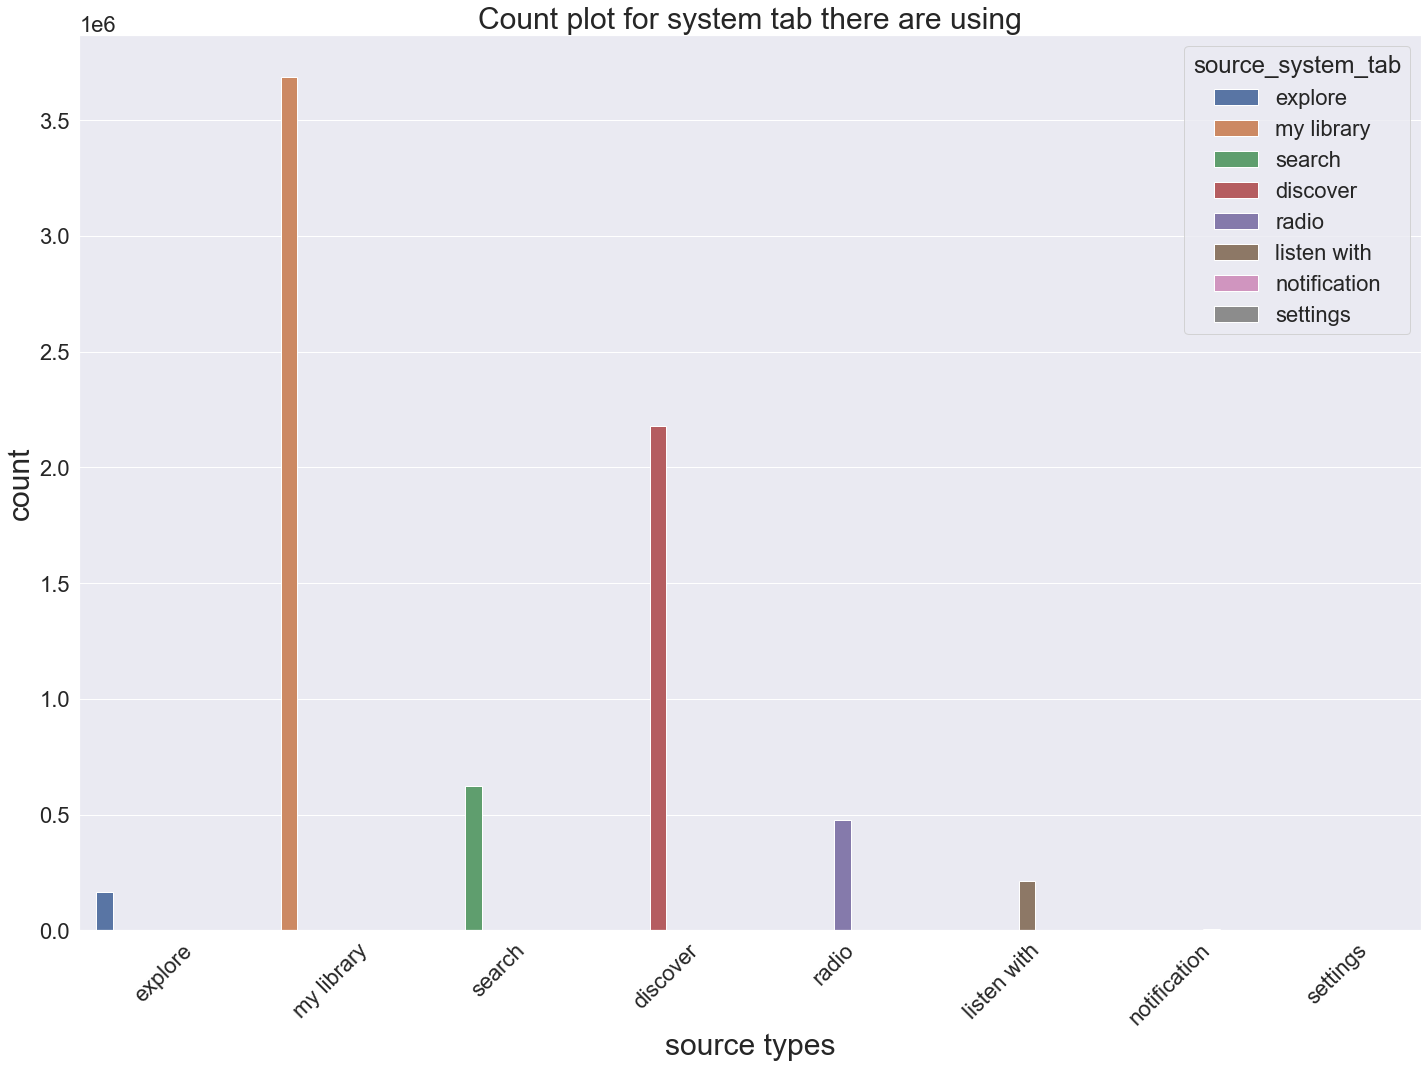

In [11]:
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.countplot(x='source_system_tab',hue='source_system_tab',data=train)
sns.set(style="darkgrid")
plt.xlabel('source types',fontsize=30)
plt.ylabel('count',fontsize=30)
plt.xticks(rotation='45')
plt.title('Count plot for system tab there are using',fontsize=30)
plt.tight_layout()

#### so anyone who has installed KKBOX app we can see most of the users are going back to there songs via my library rather discovering them means there are different sources they can go back but most preffered one is my library 

#### now doing some visualiaztion in members.csv

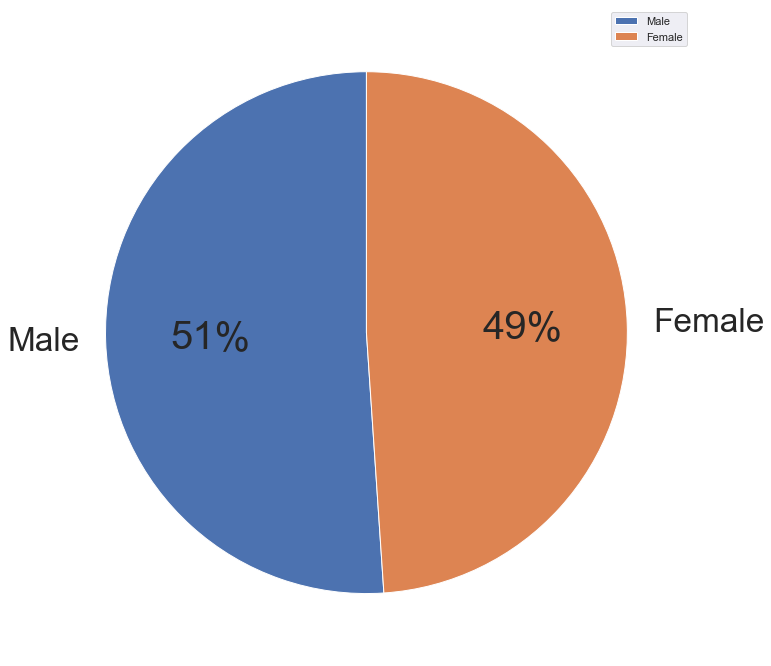

In [12]:
import matplotlib as mpl

mpl.rcParams['font.size'] = 40.0
labels = ['Male','Female']
plt.figure(figsize = (12, 12))
sizes = pd.value_counts(members.gender)
patches, texts, autotexts = plt.pie(sizes, 
                                    labels=labels, autopct='%.0f%%',
                                    shadow=False, radius=1,startangle=90)
for t in texts:
    t.set_size('smaller')
plt.legend()
plt.show()


#### As we can see we have male users more now visualization has to be done in this manner like from how many types genders which are popular ways to go back in there playlist

my library      3684730
discover        2179252
search           623286
radio            476701
listen with      212266
explore          167949
notification       6185
settings           2200
Name: source_system_tab, dtype: int64


<Figure size 1440x1440 with 0 Axes>

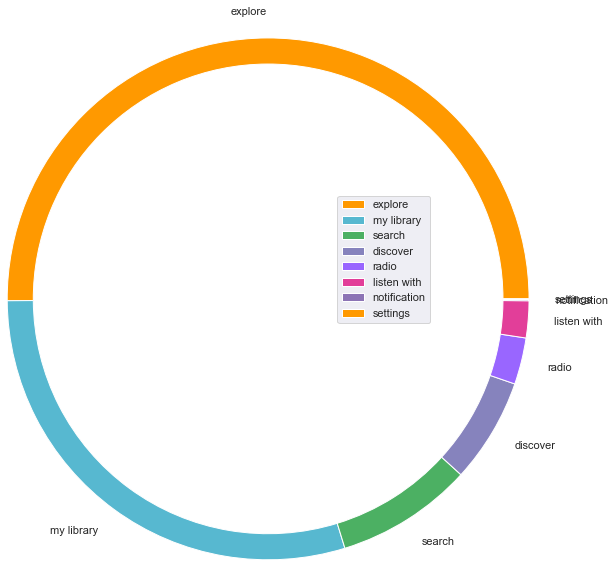

In [13]:
import matplotlib.pyplot as plt
mpl.rcParams['font.size'] = 40.0
plt.figure(figsize = (20, 20)) 
# Make data: I have 3 groups and 7 subgroups
group_names=['explore','my library','search','discover','radio','listen with','notification','settings']
group_size=pd.value_counts(train.source_system_tab)
print(group_size)
subgroup_names=['Male','Female']
subgroup_size=pd.value_counts(members.gender)
 
# Create colors
a, b, c,d,e,f,g,h=[plt.cm.autumn, plt.cm.GnBu, plt.cm.YlGn,plt.cm.Purples,plt.cm.cool,plt.cm.RdPu,plt.cm.BuPu,plt.cm.bone]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, texts= ax.pie(group_size, radius=3.0,labels=group_names, colors=[a(0.6), b(0.6), c(0.6),d(0.6), e(0.6), f(0.6),g(0.6)])
plt.setp( mypie, width=0.3, edgecolor='white')
 
# Second Ring (Inside)
#mypie2, texts1 = ax.pie(subgroup_size, radius=3.0-0.3, labels=subgroup_names, labeldistance=0.7, colors=[h(0.5), b(0.4)])
#plt.setp( mypie2, width=0.3, edgecolor='white')
#plt.margins(0,0)
#for t in texts:
 #   t.set_size(25.0)
#for t in texts1:
 
    #t.set_size(25.0)    
plt.legend() 
# show it
plt.show()


#### Inferences we can draw from this chart that among Men exploration method is only way they are using while females are using every possible way to get back their music of choices , in real world this thing also very much similar that men focuses in one direction in depth whereas women focuses in every possible direction but not in depth

#### We are moving in right direction of building a good accurate systems

#### now some statistics inferences 
#### as we have numeric data in tow csv files and rest of the files with categorical data so members.csv file with 2 columns in numeric and song.csv 

In [14]:
print(members.describe())

               city            bd  registered_via  registration_init_time  \
count  34403.000000  34403.000000    34403.000000            3.440300e+04   
mean       5.371276     12.280935        5.953376            2.013994e+07   
std        6.243929     18.170251        2.287534            2.954015e+04   
min        1.000000    -43.000000        3.000000            2.004033e+07   
25%        1.000000      0.000000        4.000000            2.012103e+07   
50%        1.000000      0.000000        7.000000            2.015090e+07   
75%       10.000000     25.000000        9.000000            2.016110e+07   
max       22.000000   1051.000000       16.000000            2.017023e+07   

       expiration_date  
count     3.440300e+04  
mean      2.016901e+07  
std       7.320925e+03  
min       1.970010e+07  
25%       2.017020e+07  
50%       2.017091e+07  
75%       2.017093e+07  
max       2.020102e+07  


In [15]:
print(songs.describe())

        song_length      language
count  2.296320e+06  2.296319e+06
mean   2.469935e+05  3.237800e+01
std    1.609200e+05  2.433241e+01
min    1.850000e+02 -1.000000e+00
25%    1.836000e+05 -1.000000e+00
50%    2.266270e+05  5.200000e+01
75%    2.772690e+05  5.200000e+01
max    1.217385e+07  5.900000e+01


## test on members

C:\Users\Harsh Pandya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'registration time ')

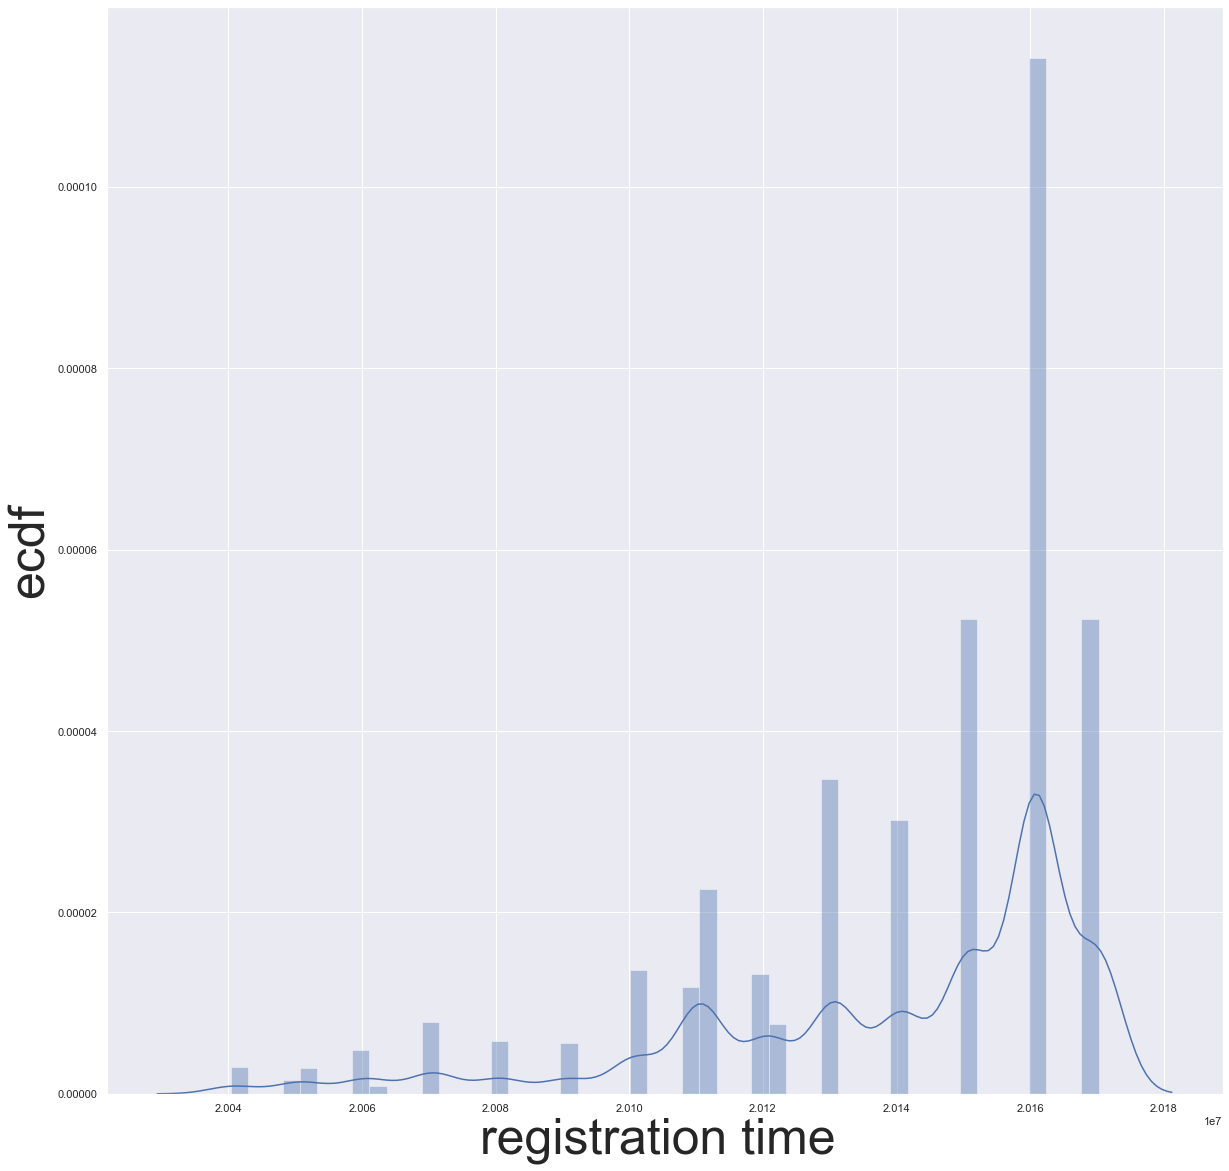

In [16]:
mpl.rcParams['font.size'] = 40.0
plt.figure(figsize = (20, 20)) 
sns.distplot(members.registration_init_time)
sns.set(font_scale=2)
plt.ylabel('ecdf',fontsize=50)
plt.xlabel('registration time ' ,fontsize=50)



#### inferences we can drawn from above two result that maximum registration were done in time period of 2012 to 2016 and most this righthand skewed graph one more thing before applying we have to normalize it 

In [17]:
members.describe()

,city,bd,registered_via,registration_init_time,expiration_date
count,34403.000000,34403.000000,34403.000000,3.440300e+04,3.440300e+04
mean,5.371276,12.280935,5.953376,2.013994e+07,2.016901e+07
std,6.243929,18.170251,2.287534,2.954015e+04,7.320925e+03
min,1.000000,-43.000000,3.000000,2.004033e+07,1.970010e+07
25%,1.000000,0.000000,4.000000,2.012103e+07,2.017020e+07
50%,1.000000,0.000000,7.000000,2.015090e+07,2.017091e+07
75%,10.000000,25.000000,9.000000,2.016110e+07,2.017093e+07
max,22.000000,1051.000000,16.000000,2.017023e+07,2.020102e+07


In [18]:
songs.describe()

,song_length,language
count,2.296320e+06,2.296319e+06
mean,2.469935e+05,3.237800e+01
std,1.609200e+05,2.433241e+01
min,1.850000e+02,-1.000000e+00
25%,1.836000e+05,-1.000000e+00
50%,2.266270e+05,5.200000e+01
75%,2.772690e+05,5.200000e+01
max,1.217385e+07,5.900000e+01


In [19]:
train.describe()

,target
count,7.377418e+06
mean,5.035171e-01
std,4.999877e-01
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.000000e+00
max,1.000000e+00


In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 6 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   msno                object
 1   song_id             object
 2   source_system_tab   object
 3   source_screen_name  object
 4   source_type         object
 5   target              int64 
dtypes: int64(1), object(5)
memory usage: 337.7+ MB


In [21]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   msno                    34403 non-null  object
 1   city                    34403 non-null  int64 
 2   bd                      34403 non-null  int64 
 3   gender                  14501 non-null  object
 4   registered_via          34403 non-null  int64 
 5   registration_init_time  34403 non-null  int64 
 6   expiration_date         34403 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


#### we can see that in members and songs csv files large differences bet min and max values which gives inferences that there are outliers in the csv files which has to be removed before making system 

#### Data conversion of int , float and categorical has to be done to reduce the data size for computation as well as storage 

In [22]:
train_members = pd.merge(train, members, on='msno', how='inner')
train_merged = pd.merge(train_members, songs, on='song_id', how='outer')
print(train_merged.head())

                                           msno  \
0  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
1  pouJqjNRmZOnRNzzMWWkamTKkIGHyvhl/jo4HgbncnM=   
2  xbodnNBaLMyqqI7uFJlvHOKMJaizuWo/BB/YHZICcKo=   
3  s0ndDsjI79amU0RBiullFN8HRz9HjE++34jGNa7zJ/s=   
4  Vw4Umh6/qlsJDC/XMslyAxVvRgFJGHr53yb/nrmY1DU=   

                                        song_id source_system_tab  \
0  BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=           explore   
1  BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=          discover   
2  BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=        my library   
3  BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=        my library   
4  BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=        my library   

     source_screen_name      source_type  target  city    bd  gender  \
0               Explore  online-playlist     1.0   1.0   0.0     NaN   
1  Online playlist more  online-playlist     0.0  15.0  18.0    male   
2   Local playlist more    local-library     1.0   1.0   0.0  

In [23]:
test_members = pd.merge(test, members, on='msno', how='inner')
test_merged = pd.merge(test_members, songs, on='song_id', how='outer')
print(test_merged.head())
print(len(test_merged.columns))

          id                                          msno  \
0        0.0  V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=   
1  1035059.0  08rvvaaab7dM7h78GC4SphLkUCSXPxpu6sY+k8aLUO4=   
2    89968.0  1NvrMNDUcvfqOIjhim8BgdK23znMzGwAO84W+qKs6dw=   
3   972394.0  GfSXhTVP3oj7h0545L/5xh6jD+7edQ7AH0iprl7dYbc=   
4  2194574.0  HkWEvfQyrb5Lve8X3B7HkCEkDFW8qFy/9kWFb4QbM5k=   

                                        song_id source_system_tab  \
0  WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=        my library   
1  WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=        my library   
2  WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=        my library   
3  WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=        my library   
4  WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=          discover   

    source_screen_name          source_type  city    bd  gender  \
0  Local playlist more        local-library   1.0   0.0     NaN   
1  Local playlist more        local-library   5.0  29.0  female   
2  Local pl

In [24]:
del train_members
del test_members

In [26]:
print(train_merged.columns.to_series().groupby(train_merged.dtypes).groups)
print(test_merged.columns.to_series().groupby(test_merged.dtypes).groups)

{float64: ['target', 'city', 'bd', 'registered_via', 'registration_init_time', 'expiration_date', 'song_length', 'language'], object: ['msno', 'song_id', 'source_system_tab', 'source_screen_name', 'source_type', 'gender', 'genre_ids', 'artist_name', 'composer', 'lyricist']}
{float64: ['id', 'city', 'bd', 'registered_via', 'registration_init_time', 'expiration_date', 'song_length', 'language'], object: ['msno', 'song_id', 'source_system_tab', 'source_screen_name', 'source_type', 'gender', 'genre_ids', 'artist_name', 'composer', 'lyricist']}


## missing values 


<AxesSubplot:>

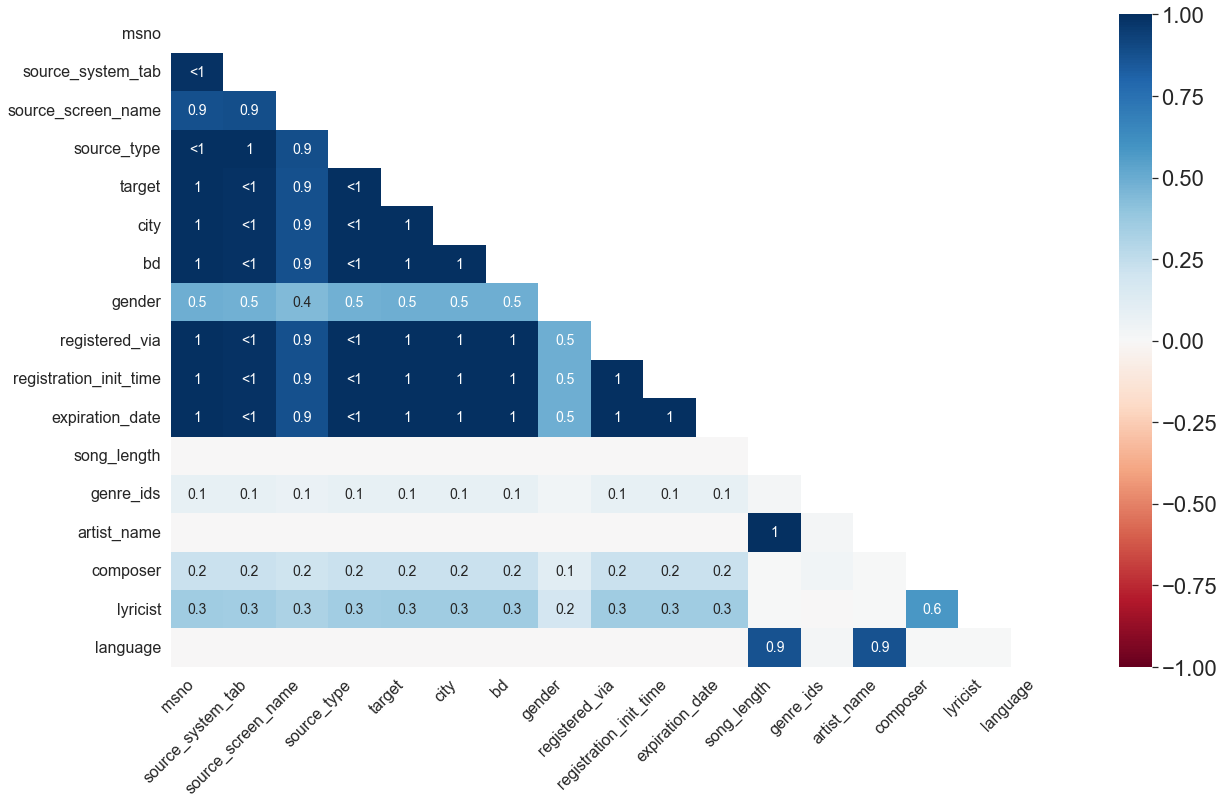

In [27]:
msno.heatmap(train_merged)
#msno.matrix(train_merged)

#### as we can see lot of missing values are coming up but when common thing we notice that most of the missing values are arrived from members and songs


#### missing values from the heatmap also showing one thing that information which are missing and has positive correlation are gender with 4 variables of train.csv and rest of varibales with members.csv

<AxesSubplot:>

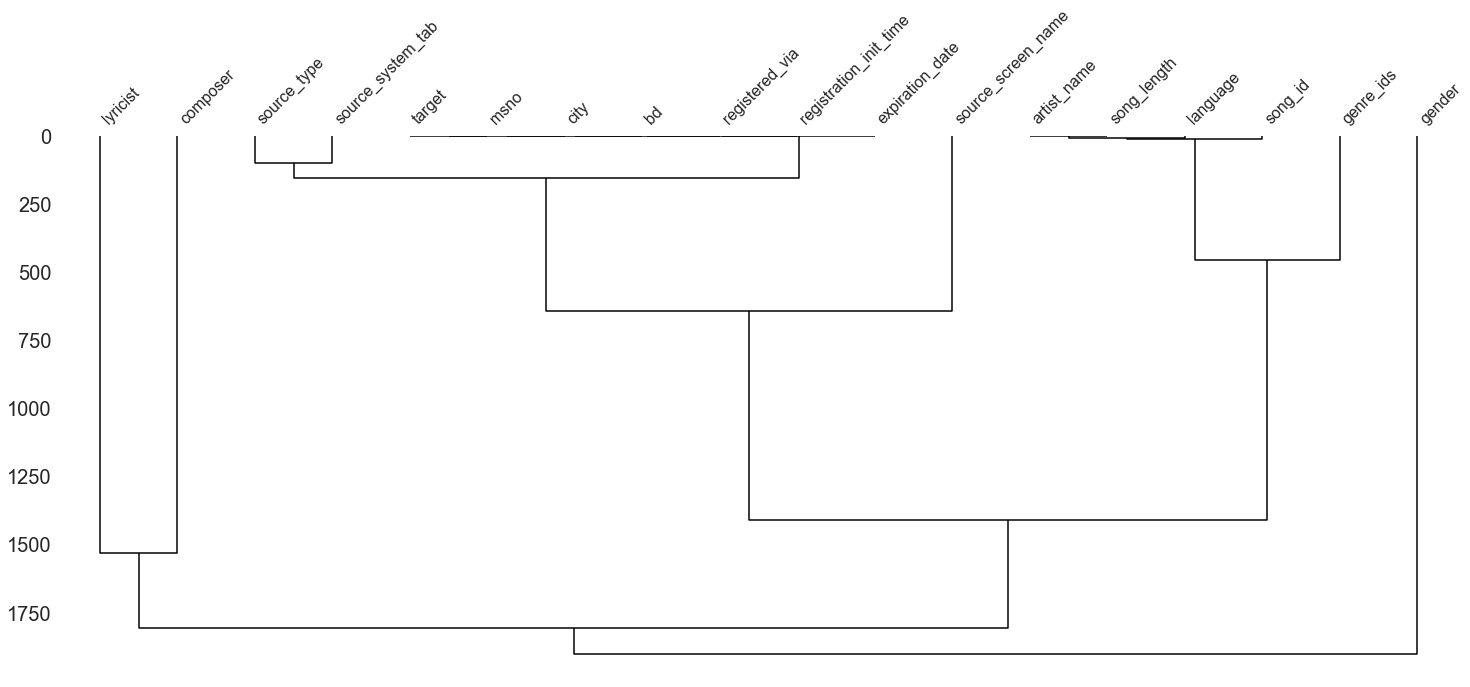

In [28]:
msno.dendrogram(train_merged)

#### A strong nullity correlation here we can see 
#### song id -> lang, song_len,artist name, genre_id
#### composer -> lyricst
#### gender -> with song_id

#### from heatmap we can say if gender is missing 70% missing values will be in msno , target city etc 

## missing values and Treat them by using average value

In [29]:
#--- Function to check if missing values are present and if so print the columns having them ---
def check_missing_values(df):
    print (df.isnull().values.any())
    if (df.isnull().values.any() == True):
        columns_with_Nan = df.columns[df.isnull().any()].tolist()
    print(columns_with_Nan)
    for col in columns_with_Nan:
        print("%s : %d" % (col, df[col].isnull().sum()))
    
check_missing_values(train_merged)
check_missing_values(test_merged)

True
['msno', 'source_system_tab', 'source_screen_name', 'source_type', 'target', 'city', 'bd', 'gender', 'registered_via', 'registration_init_time', 'expiration_date', 'song_length', 'genre_ids', 'artist_name', 'composer', 'lyricist', 'language']
msno : 1936406
source_system_tab : 1961255
source_screen_name : 2351210
source_type : 1957945
target : 1936406
city : 1936406
bd : 1936406
gender : 4897885
registered_via : 1936406
registration_init_time : 1936406
expiration_date : 1936406
song_length : 114
genre_ids : 205338
artist_name : 114
composer : 2591558
lyricist : 4855358
language : 150
True
['id', 'msno', 'source_system_tab', 'source_screen_name', 'source_type', 'city', 'bd', 'gender', 'registered_via', 'registration_init_time', 'expiration_date', 'song_length', 'genre_ids', 'artist_name', 'composer', 'lyricist', 'language']
id : 2071581
msno : 2071581
source_system_tab : 2080023
source_screen_name : 2234464
source_type : 2078878
city : 2071581
bd : 2071581
gender : 3123805
register

In [30]:
#--- Function to replace Nan values in columns of type float with -5 ---
def replace_Nan_non_object(df):
    object_cols = list(df.select_dtypes(include=['float']).columns)
    for col in object_cols:
        df[col]=df[col].fillna(np.int(-5))
       
replace_Nan_non_object(train_merged) 
replace_Nan_non_object(test_merged)  

C:\Users\HARSHP~1\AppData\Local\Temp/ipykernel_14608/244486868.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df[col]=df[col].fillna(np.int(-5))


In [31]:
#--- memory consumed by train dataframe ---
mem = train_merged.memory_usage(index=True).sum()
print("Memory consumed by training set  :   {} MB" .format(mem/ 1024**2))
 
#--- memory consumed by test dataframe ---
mem = test_merged.memory_usage(index=True).sum()
print("Memory consumed by test set      :   {} MB" .format(mem/ 1024**2))

Memory consumed by training set  :   1350.117919921875 MB
Memory consumed by test set      :   670.9216995239258 MB


In [32]:
def change_datatype(df):
    float_cols = list(df.select_dtypes(include=['float']).columns)
    for col in float_cols:
        if ((np.max(df[col]) <= 127) and(np.min(df[col] >= -128))):
            df[col] = df[col].astype(np.int8)
        elif ((np.max(df[col]) <= 32767) and(np.min(df[col] >= -32768))):
            df[col] = df[col].astype(np.int16)
        elif ((np.max(df[col]) <= 2147483647) and(np.min(df[col] >= -2147483648))):
            df[col] = df[col].astype(np.int32)
        else:
            df[col] = df[col].astype(np.int64)

change_datatype(train_merged)
change_datatype(test_merged)

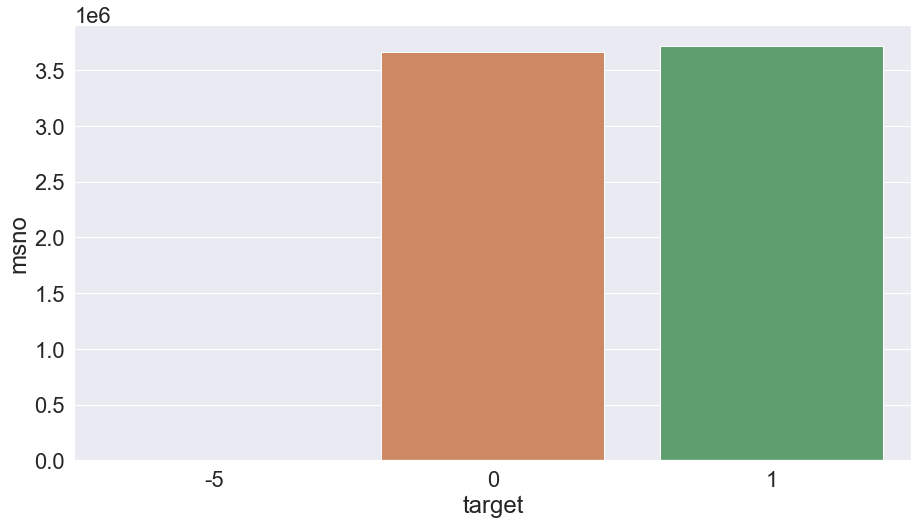

In [33]:
data = train_merged.groupby('target').aggregate({'msno':'count'}).reset_index()
a4_dims = (15, 8)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.barplot(x='target', y='msno', data=data)

#### as we can see that new user are about 5500 and old users about 15000  , 
#### *-5 are those values which are empty 


<AxesSubplot:xlabel='source_system_tab', ylabel='msno'>

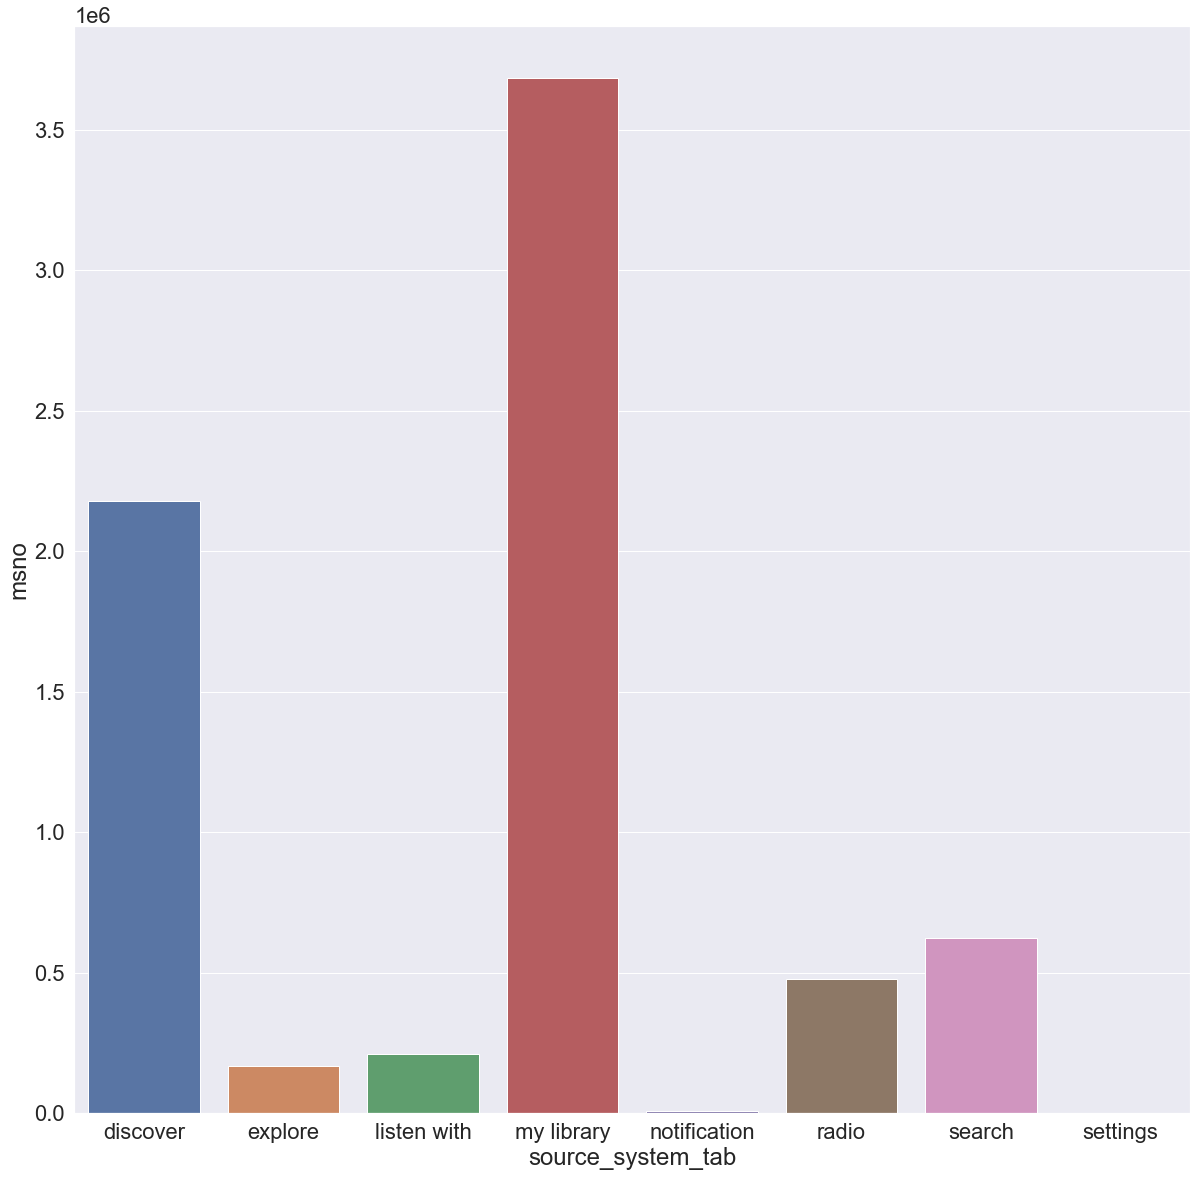

In [34]:
mpl.rcParams['font.size'] = 40.0
plt.figure(figsize = (20, 20)) 
data=train_merged.groupby('source_system_tab').aggregate({'msno':'count'}).reset_index()
sns.barplot(x='source_system_tab',y='msno',data=data)

[Text(0, 0, 'Album more'),
 Text(1, 0, 'Artist more'),
 Text(2, 0, 'Concert'),
 Text(3, 0, 'Discover Chart'),
 Text(4, 0, 'Discover Feature'),
 Text(5, 0, 'Discover Genre'),
 Text(6, 0, 'Discover New'),
 Text(7, 0, 'Explore'),
 Text(8, 0, 'Local playlist more'),
 Text(9, 0, 'My library'),
 Text(10, 0, 'My library_Search'),
 Text(11, 0, 'Online playlist more'),
 Text(12, 0, 'Others profile more'),
 Text(13, 0, 'Payment'),
 Text(14, 0, 'Radio'),
 Text(15, 0, 'Search'),
 Text(16, 0, 'Search Home'),
 Text(17, 0, 'Search Trends'),
 Text(18, 0, 'Self profile more'),
 Text(19, 0, 'Unknown')]

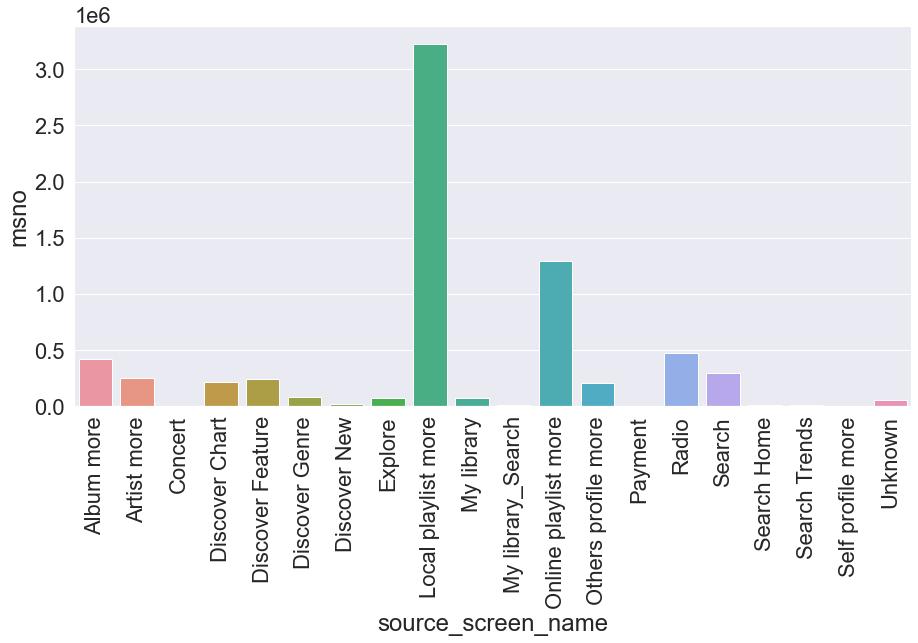

In [35]:
data = train_merged.groupby('source_screen_name').aggregate({'msno':'count'}).reset_index()
a4_dims = (15, 7)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.barplot(x='source_screen_name', y='msno', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0, 0, 'album'),
 Text(1, 0, 'artist'),
 Text(2, 0, 'listen-with'),
 Text(3, 0, 'local-library'),
 Text(4, 0, 'local-playlist'),
 Text(5, 0, 'my-daily-playlist'),
 Text(6, 0, 'online-playlist'),
 Text(7, 0, 'radio'),
 Text(8, 0, 'song'),
 Text(9, 0, 'song-based-playlist'),
 Text(10, 0, 'top-hits-for-artist'),
 Text(11, 0, 'topic-article-playlist')]

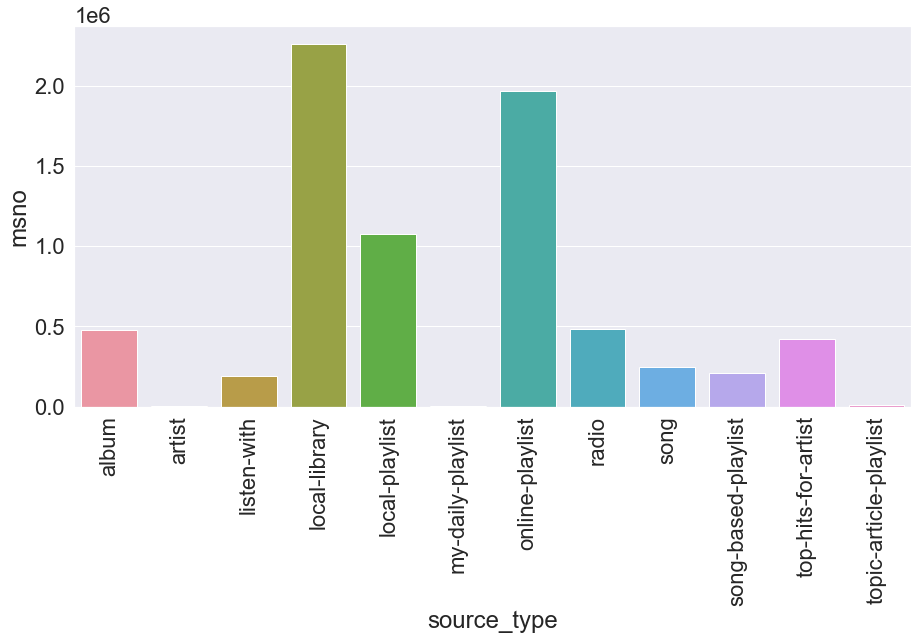

In [36]:
data = train_merged.groupby('source_type').aggregate({'msno':'count'}).reset_index()
a4_dims = (15, 7)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.barplot(x='source_type', y='msno', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0, 0, '-5'),
 Text(1, 0, '-1'),
 Text(2, 0, '3'),
 Text(3, 0, '10'),
 Text(4, 0, '17'),
 Text(5, 0, '24'),
 Text(6, 0, '31'),
 Text(7, 0, '38'),
 Text(8, 0, '45'),
 Text(9, 0, '52'),
 Text(10, 0, '59')]

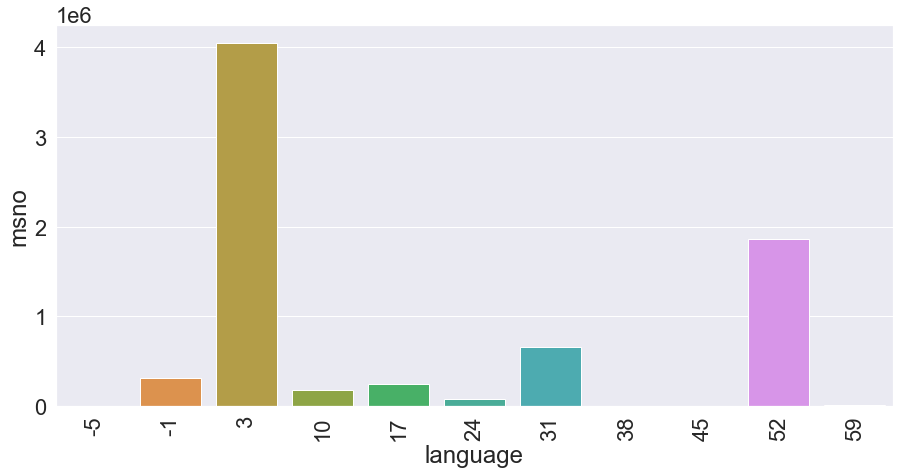

In [37]:
data = train_merged.groupby('language').aggregate({'msno':'count'}).reset_index()
a4_dims = (15, 7)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.barplot(x='language', y='msno', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0, 0, '-5'),
 Text(1, 0, '3'),
 Text(2, 0, '4'),
 Text(3, 0, '7'),
 Text(4, 0, '9'),
 Text(5, 0, '13')]

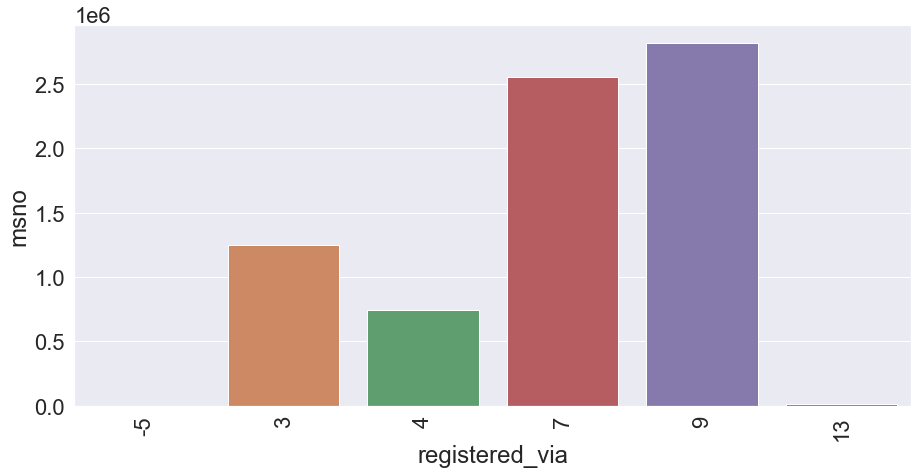

In [38]:
data = train_merged.groupby('registered_via').aggregate({'msno':'count'}).reset_index()
a4_dims = (15, 7)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.barplot(x='registered_via', y='msno', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

## Top 7 users and 9 ways to get registered

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'expiration_date', 'song_length', 'genre_ids',
       'artist_name', 'composer', 'lyricist', 'language'],
      dtype='object')


[Text(0, 0, '-5'),
 Text(1, 0, '1'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5'),
 Text(5, 0, '6'),
 Text(6, 0, '7'),
 Text(7, 0, '8'),
 Text(8, 0, '9'),
 Text(9, 0, '10'),
 Text(10, 0, '11'),
 Text(11, 0, '12'),
 Text(12, 0, '13'),
 Text(13, 0, '14'),
 Text(14, 0, '15'),
 Text(15, 0, '16'),
 Text(16, 0, '17'),
 Text(17, 0, '18'),
 Text(18, 0, '19'),
 Text(19, 0, '20'),
 Text(20, 0, '21'),
 Text(21, 0, '22')]

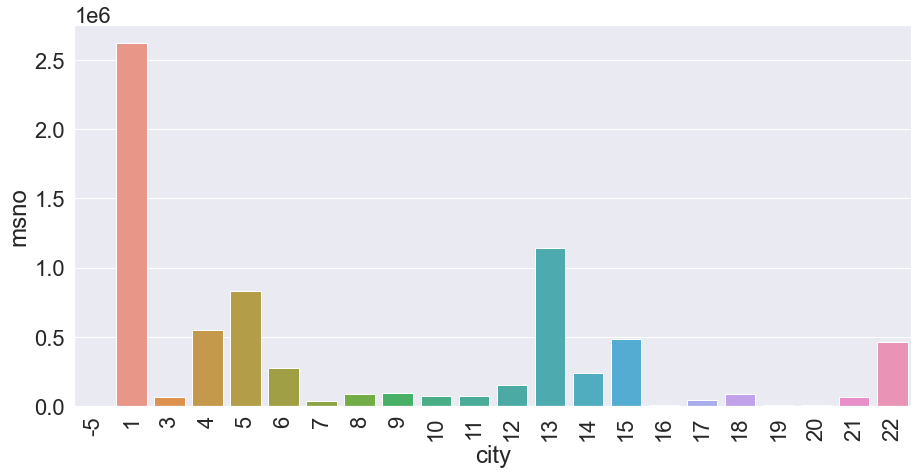

In [39]:
print(train_merged.columns)
data = train_merged.groupby('city').aggregate({'msno':'count'}).reset_index()
a4_dims = (15, 7)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.barplot(x='city', y='msno', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# no of users are 1,13,5 are containig maximum values 

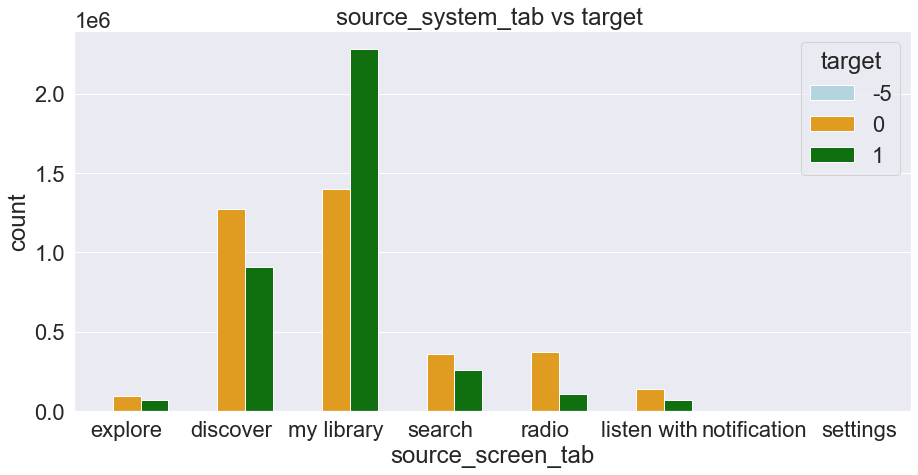

In [40]:
a4_dims = (15, 7)
fig, ax = plt.subplots(figsize=a4_dims)
ax=sns.countplot(x="source_system_tab",data=train_merged,palette=['lightblue','orange','green'],hue="target")
plt.xlabel("source_screen_tab")
plt.ylabel("count")
plt.title("source_system_tab vs target ")
plt.show()

# new user are coming form discover and my llibrary and old ones are from my library

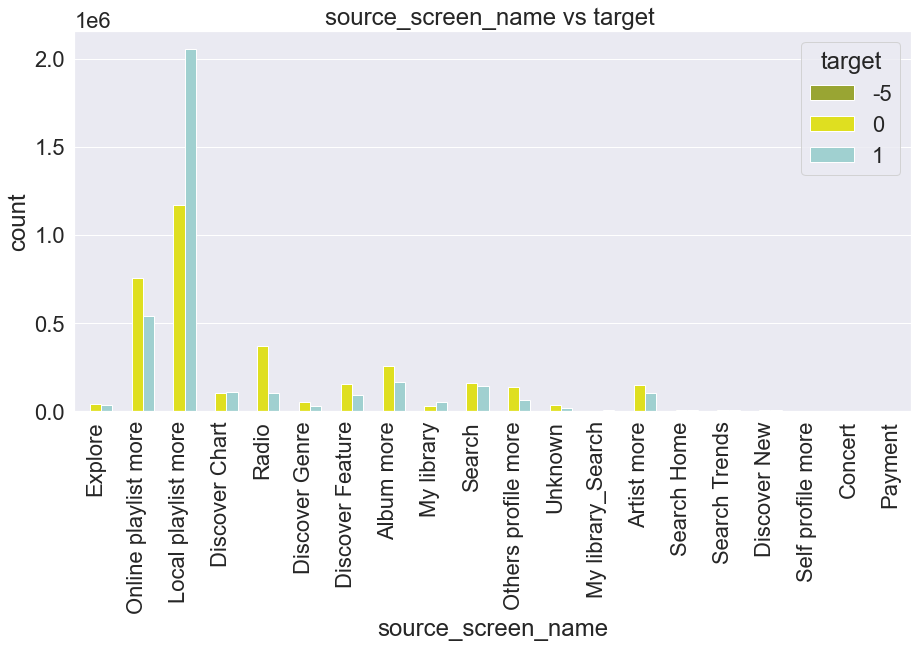

In [41]:
a4_dims = (15, 7)
fig, ax = plt.subplots(figsize=a4_dims)
ax=sns.countplot(x="source_screen_name",data=train_merged,palette=['#A8B820','yellow','#98D8D8'],hue="target")
plt.xlabel("source_screen_name")
plt.ylabel("count")
plt.title("source_screen_name vs target ")
plt.xticks(rotation='90')
plt.show()

# local playlist among new user and old one more most common way to get back their songs

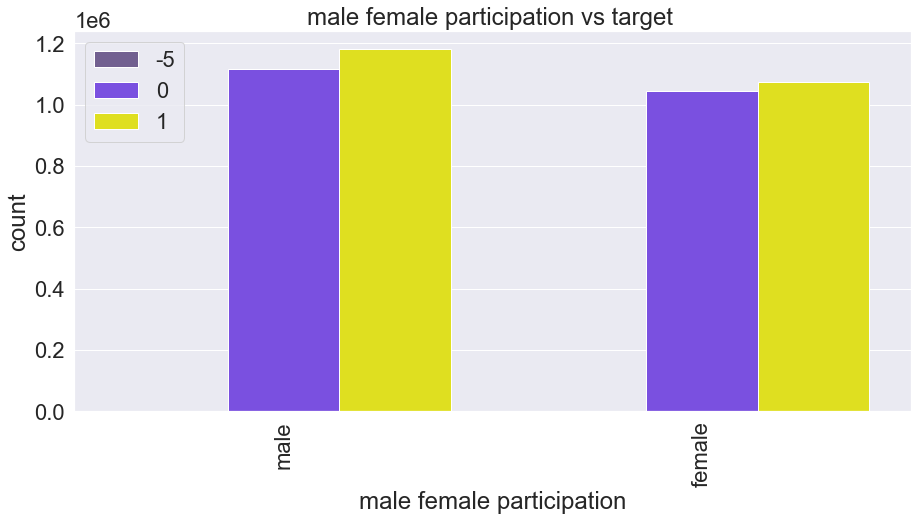

In [42]:
a4_dims = (15, 7)
fig, ax = plt.subplots(figsize=a4_dims)
ax=sns.countplot(x="gender",data=train_merged,palette=['#705898','#7038F8','yellow'],hue="target")
plt.xlabel("male female participation")
plt.ylabel("count")
plt.title("male female participation vs target ")
plt.xticks(rotation='90')
plt.legend(loc='upper left')
plt.show()

# new female users are more than male users about 500 to 600

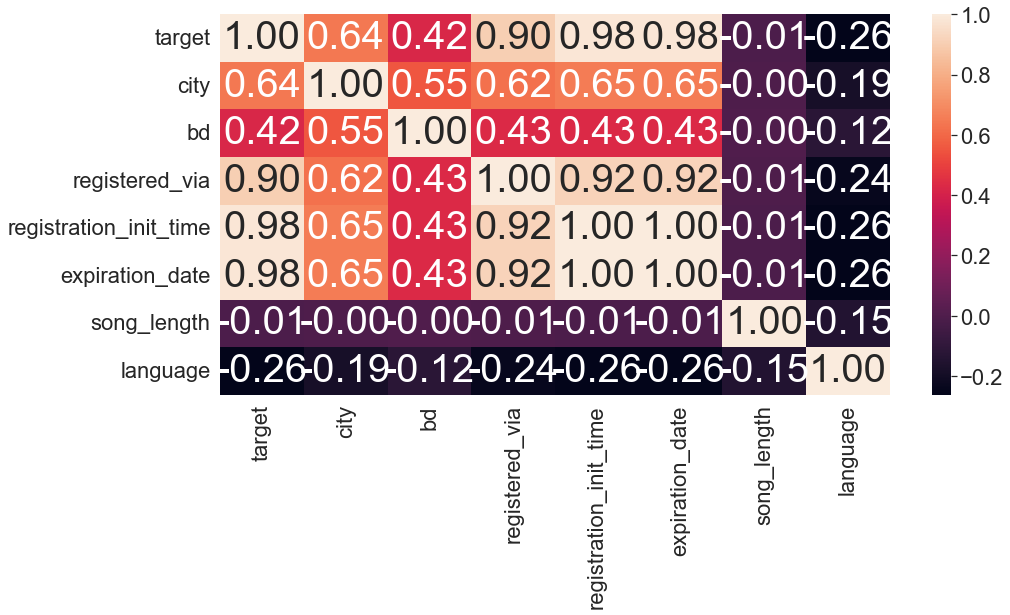

In [43]:
a4_dims = (15, 7)
fig, ax = plt.subplots(figsize=a4_dims)
ax=sns.heatmap(data=train_merged.corr(),annot=True,fmt=".2f")

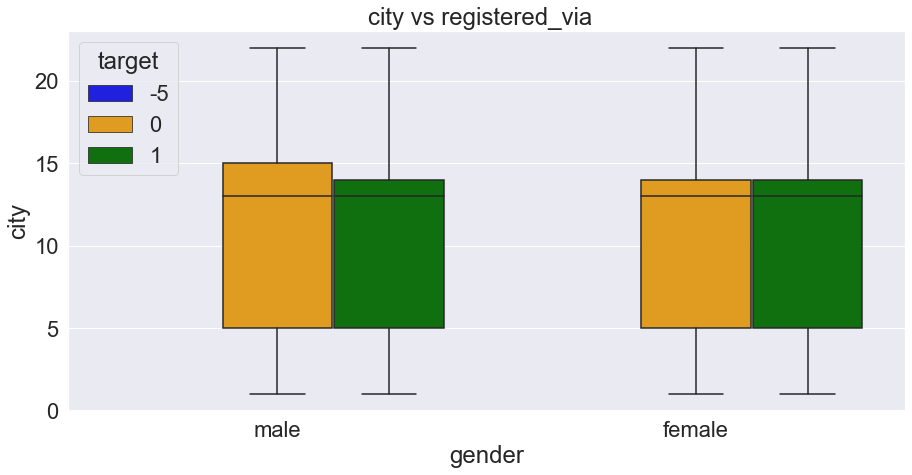

In [44]:
a4_dims = (15, 7)
fig, ax = plt.subplots(figsize=a4_dims)
ax=sns.boxplot(x="gender",y="city",data=train_merged,palette=['blue','orange','green'],hue="target")
plt.xlabel("gender")
plt.ylabel("city")
plt.title("city vs registered_via  ")
plt.show()

# here we can see that most of our user are between 5 to 14 no of cities might be female ratio is same 

# avg no of male users are 13 to 15 city no 

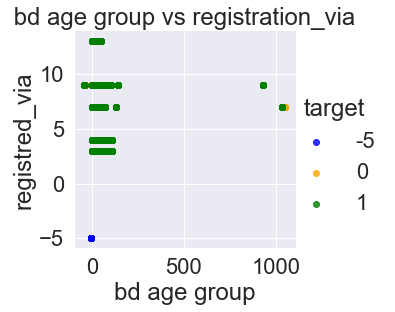

In [45]:
ax=sns.lmplot(x="bd",y="registered_via",data=train_merged,palette=['blue','orange','green'],hue="target",fit_reg=False)
plt.xlabel("bd age group")
plt.ylabel("registred_via")
plt.title(" bd age group vs registration_via ")
plt.show()

- now we can see on thing that music users vary age form 0 to 100 we can see here are outliers to in bd but interesting information are that most users age group of younsters and 30+ age group form 5 to 10 registered_via index

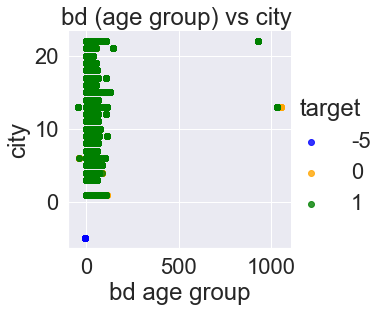

In [46]:
ax=sns.lmplot(x="bd",y="city",data=train_merged,palette=['blue','orange','green'],hue="target",fit_reg=False)
plt.xlabel("bd age group")
plt.ylabel("city")
plt.title("bd (age group) vs city ")
plt.show()

- with outlier as we can we didn't remove till now we will remove bd outliers at final stages before applying Ml but that last results insights are telling we have age group 20 to 30+ ages and city index we most 5 to 14 

## remomving outlier from bd age group column

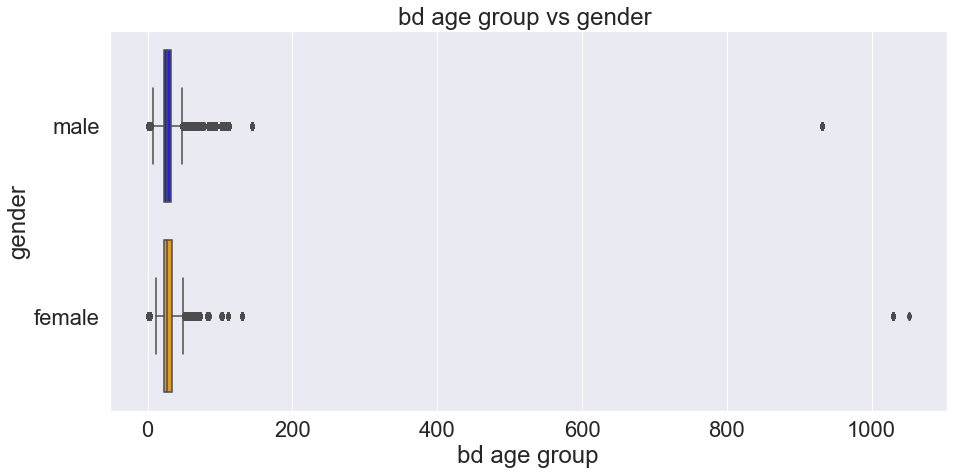

In [47]:
a4_dims = (15, 7)
fig, ax = plt.subplots(figsize=a4_dims)
ax=sns.boxplot(x="bd",y="gender",data=train_merged,palette=['blue','orange','green'])
plt.xlabel("bd age group")
plt.ylabel("gender")
plt.title("bd age group vs gender ")
plt.show()

- as we can see that mean age group we have 24 to 27 with max is 50 in female case and in male case 48 about age group is max and  min in female it is about 16 and in male case 18 

- one more observation we can see that female outlier are more there reason behind this logic females always tend fill up the things in hurry way because in male we can't see male with 100 , as if this bit funny logic , apart from this it all due unclean data that's it which we have to remove outliers

In [48]:
train_merged.describe()
def remove_outlier(df_in, col_name):

    #q1 = df_in[col_name].quantile(0.25)
    #q3 = df_in[col_name].quantile(0.75)
    #iqr = q3-q1 #Interquartile range
    fence_low  = 12
    fence_high = 45
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out
df_final_train=remove_outlier(train_merged,'bd')

- i guess we have almost clean data in this data cleanning i used brute force approach as i get 0.75 percentile values as 0 so there is now way taking standard deviations so i used lookup approach to remove outliers special in this bd age group let's hope my system accurarcy don't went down 

- Now moving toward ML approach or machine learning 

# Clean the test data set

In [56]:
print('Loading...')
data_path = 'C:\\Users\\Harsh Pandya\\OneDrive\\Desktop\\NDF\\'
train = pd.read_csv(data_path + 'train.csv', dtype={'msno' : 'category',
                                                'source_system_tab' : 'category',
                                                  'source_screen_name' : 'category',
                                                  'source_type' : 'category',
                                                  'target' : np.uint8,
                                                  'song_id' : 'category'})
test = pd.read_csv(data_path + 'test.csv', dtype={'msno' : 'category',
                                                'source_system_tab' : 'category',
                                                'source_screen_name' : 'category',
                                                'source_type' : 'category',
                                                'song_id' : 'category'})
songs = pd.read_csv(data_path + 'songs.csv',dtype={'genre_ids': 'category',
                                                  'language' : 'category',
                                                  'artist_name' : 'category',
                                                  'composer' : 'category',
                                                  'lyricist' : 'category',
                                                  'song_id' : 'category'})
members = pd.read_csv(data_path + 'members.csv',dtype={'city' : 'category',
                                                      'bd' : np.uint8,
                                                      'gender' : 'category',
                                                      'registered_via' : 'category'},
                     parse_dates=['registration_init_time','expiration_date'])
songs_extra = pd.read_csv(data_path + 'song_extra_info.csv')
print('Done')

Loading...
Done


In [57]:
song_cols = ['song_id', 'artist_name', 'genre_ids', 'song_length', 'language']
train = train.merge(songs[song_cols], on='song_id', how='left')
test = test.merge(songs[song_cols], on='song_id', how='left')

members['registration_year'] = members['registration_init_time'].apply(lambda x: int(str(x)[0:4]))
#members['registration_month'] = members['registration_init_time'].apply(lambda x: int(str(x)[4:6]))
#members['registration_date'] = members['registration_init_time'].apply(lambda x: int(str(x)[6:8]))

members['expiration_year'] = members['expiration_date'].apply(lambda x: int(str(x)[0:4]))
members['expiration_month'] = members['expiration_date'].apply(lambda x: int(str(x)[4:6]))
#members['expiration_date'] = members['expiration_date'].apply(lambda x: int(str(x)[6:8]))

# exepting some unimportanat features


# Convert date to number of days
members['membership_days'] = (members['expiration_date'] - members['registration_init_time']).dt.days.astype(int)

#members = members.drop(['registration_init_time'], axis=1)
#members = members.drop(['expiration_date'], axis=1)

In [58]:
# categorize membership_days 
members['membership_days'] = members['membership_days']//200
members['membership_days'] = members['membership_days'].astype('category')

In [59]:
member_cols = ['msno','city','registered_via', 'registration_year', 'expiration_year', 'membership_days']

train = train.merge(members[member_cols], on='msno', how='left')
test = test.merge(members[member_cols], on='msno', how='left')


In [60]:
train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7377418 entries, 0 to 7377417
Data columns (total 15 columns):
 #   Column              Dtype   
---  ------              -----   
 0   msno                object  
 1   song_id             object  
 2   source_system_tab   category
 3   source_screen_name  category
 4   source_type         category
 5   target              uint8   
 6   artist_name         category
 7   genre_ids           category
 8   song_length         float64 
 9   language            category
 10  city                category
 11  registered_via      category
 12  registration_year   int64   
 13  expiration_year     int64   
 14  membership_days     category
dtypes: category(9), float64(1), int64(2), object(2), uint8(1)
memory usage: 446.0+ MB


In [61]:
def isrc_to_year(isrc):
    if type(isrc) == str:
        if int(isrc[5:7]) > 17:
            return int(isrc[5:7])//5
        else:
            return int(isrc[5:7])//5
    else:
        return np.nan
#categorize song_year per 5years

songs_extra['song_year'] = songs_extra['isrc'].apply(isrc_to_year)
songs_extra.drop(['isrc', 'name'], axis = 1, inplace = True)

In [62]:
train = train.merge(songs_extra, on = 'song_id', how = 'left')
test = test.merge(songs_extra, on = 'song_id', how = 'left')


In [63]:
train['genre_ids'] = train['genre_ids'].str.split('|').str[0]

In [64]:
temp_song_length = train['song_length']

In [65]:
train.drop('song_length', axis = 1, inplace = True)
test.drop('song_length',axis = 1 , inplace =True)

In [66]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,artist_name,genre_ids,language,city,registered_via,registration_year,expiration_year,membership_days,song_year
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,Bastille,359,52.0,1,7,2012,2017,10,3.0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,Various Artists,1259,52.0,13,9,2011,2017,11,19.0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,Nas,1259,52.0,13,9,2011,2017,11,1.0
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,Soundway,1019,-1.0,13,9,2011,2017,11,2.0
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,Brett Young,1011,52.0,1,7,2012,2017,10,3.0


In [67]:
song_count = train.loc[:,["song_id","target"]]

# measure repeat count by played songs
song_count1 = song_count.groupby(["song_id"],as_index=False).sum().rename(columns={"target":"repeat_count"})

# count play count by songs
song_count2 = song_count.groupby(["song_id"],as_index=False).count().rename(columns = {"target":"play_count"})

In [68]:
song_repeat = song_count1.merge(song_count2,how="inner",on="song_id")
song_repeat["repeat_percentage"] = round((song_repeat['repeat_count']*100) / song_repeat['play_count'],1)
song_repeat['repeat_count'] = song_repeat['repeat_count'].astype('int')
song_repeat['repeat_percentage'] = song_repeat['repeat_percentage'].replace(100.0,np.nan)
#cuz most of 100.0 are played=1 repeated=1 values. I think it is not fair compare with other played a lot songs

In [69]:
train = train.merge(song_repeat,on="song_id",how="left")
test = test.merge(song_repeat,on="song_id",how="left")

In [70]:
# type cast
test['song_id'] = test['song_id'].astype('category')
test['repeat_count'] = test['repeat_count'].fillna(0)
test['repeat_count'] = test['repeat_count'].astype('int')
test['play_count'] = test['play_count'].fillna(0)
test['play_count'] = test['play_count'].astype('int')
#train['repeat_percentage'].replace(100.0,np.nan)


In [71]:
artist_count = train.loc[:,["artist_name","target"]]

# measure repeat count by played songs
artist_count1 = artist_count.groupby(["artist_name"],as_index=False).sum().rename(columns={"target":"repeat_count_artist"})

# measure play count by songs
artist_count2 = artist_count.groupby(["artist_name"],as_index=False).count().rename(columns = {"target":"play_count_artist"})

artist_repeat = artist_count1.merge(artist_count2,how="inner",on="artist_name")


In [72]:
artist_repeat["repeat_percentage_artist"] = round((artist_repeat['repeat_count_artist']*100) / artist_repeat['play_count_artist'],1)
artist_repeat['repeat_count_artist'] = artist_repeat['repeat_count_artist'].fillna(0)
artist_repeat['repeat_count_artist'] = artist_repeat['repeat_count_artist'].astype('int')
artist_repeat['repeat_percentage_artist'] = artist_repeat['repeat_percentage_artist'].replace(100.0,np.nan)

In [73]:
#use only repeat_percentage_artist
del artist_repeat['repeat_count_artist']
#del artist_repeat['play_count_artist']

# so we can decision tree was much better than extra trees classifier

In [74]:
#merge it with artist_name to train dataframe
train = train.merge(artist_repeat,on="artist_name",how="left")
test = test.merge(artist_repeat,on="artist_name",how="left")

# here decision tree at it's final showoff can expect too much from this one 


In [75]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7377418 entries, 0 to 7377417
Data columns (total 20 columns):
 #   Column                    Dtype   
---  ------                    -----   
 0   msno                      object  
 1   song_id                   object  
 2   source_system_tab         category
 3   source_screen_name        category
 4   source_type               category
 5   target                    uint8   
 6   artist_name               category
 7   genre_ids                 object  
 8   language                  category
 9   city                      category
 10  registered_via            category
 11  registration_year         int64   
 12  expiration_year           int64   
 13  membership_days           category
 14  song_year                 float64 
 15  repeat_count              int32   
 16  play_count                int64   
 17  repeat_percentage         float64 
 18  play_count_artist         float64 
 19  repeat_percentage_artist  float64 
dtypes:

In [76]:
del train['artist_name']
del test['artist_name']

In [77]:
msno_count = train.loc[:,["msno","target"]]

# count repeat count by played songs
msno_count1 = msno_count.groupby(["msno"],as_index=False).sum().rename(columns={"target":"repeat_count_msno"})

# count play count by songs
msno_count2 = msno_count.groupby(["msno"],as_index=False).count().rename(columns = {"target":"play_count_msno"})

msno_repeat = msno_count1.merge(msno_count2,how="inner",on="msno")

In [78]:
msno_repeat["repeat_percentage_msno"] = round((msno_repeat['repeat_count_msno']*100) / msno_repeat['play_count_msno'],1)
msno_repeat['repeat_count_msno'] = msno_repeat['repeat_count_msno'].fillna(0)
msno_repeat['repeat_count_msno'] = msno_repeat['repeat_count_msno'].astype('int')
#msno_repeat['repeat_percentage_msno'] = msno_repeat['repeat_percentage_msno'].replace(100.0,np.nan)
# it can be meaningful so do not erase 100.0 

In [79]:
#merge it with msno to train dataframe
train = train.merge(msno_repeat,on="msno",how="left")
test = test.merge(msno_repeat,on="msno",how="left")


In [80]:
import gc
#del members, songs; gc.collect();

for col in train.columns:
    if train[col].dtype == object:
        train[col] = train[col].astype('category')
        test[col] = test[col].astype('category')

In [81]:
train['song_year'] = train['song_year'].astype('category')
test['song_year'] = test['song_year'].astype('category')

In [82]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,genre_ids,language,city,registered_via,...,membership_days,song_year,repeat_count,play_count,repeat_percentage,play_count_artist,repeat_percentage_artist,repeat_count_msno,play_count_msno,repeat_percentage_msno
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,359,52.0,1,7,...,10,3.0,102,215,47.4,1140.0,46.3,2791,5511,50.6
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,1259,52.0,13,9,...,11,19.0,1,1,NaN,303616.0,51.0,462,622,74.3
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,1259,52.0,13,9,...,11,1.0,2,4,50.0,289.0,21.5,462,622,74.3
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,1019,-1.0,13,9,...,11,2.0,1,1,NaN,1.0,NaN,462,622,74.3
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,1011,52.0,1,7,...,10,3.0,150,412,36.4,427.0,37.7,2791,5511,50.6


In [83]:
drop_list = ['repeat_count','repeat_percentage',
             'repeat_percentage_artist',
             'repeat_count_msno','repeat_percentage_msno'
            ]
train = train.drop(drop_list,axis=1)
test = test.drop(drop_list,axis=1)

# as we can see that accuracy is more but still auc_score is very less 

In [84]:
test['play_count_msno'] = test['play_count_msno'].fillna(0)
test['play_count_msno'] = test['play_count_msno'].astype('int')


train['play_count_artist'] = train['play_count_artist'].fillna(0)
test['play_count_artist'] = test['play_count_artist'].fillna(0)
train['play_count_artist'] = train['play_count_artist'].astype('int')
test['play_count_artist'] = test['play_count_artist'].astype('int')


In [ ]:
from sklearn.model_selection import KFold
# Create a Cross Validation with 3 splits
kf = KFold(n_splits=3)

predictions = np.zeros(shape=[len(test)])

# For each KFold
for train_indices ,validate_indices in kf.split(train) : 
    train_data = lgb.Dataset(train.drop(['target'],axis=1).loc[train_indices,:],label=train.loc[train_indices,'target'])
    val_data = lgb.Dataset(train.drop(['target'],axis=1).loc[validate_indices,:],label=train.loc[validate_indices,'target'])

    params = {
            'objective': 'binary',
            'boosting': 'gbdt',
            'learning_rate': 0.2 ,
            'verbose': 0,
            'num_leaves': 2**8,
            'bagging_fraction': 0.95,
            'bagging_freq': 1,
            'bagging_seed': 1,
            'feature_fraction': 0.9,
            'feature_fraction_seed': 1,
            'max_bin': 256,
            'num_rounds': 80,
            'metric' : 'auc'
        }
    # Train the model    
    lgbm_model = lgb.train(params, train_data, 100, valid_sets=[val_data])
    predictions += lgbm_model.predict(test.drop(['id'],axis=1))
    del lgbm_model
    # We get the ammount of predictions from the prediction list, by dividing the predictions by the number of Kfolds.
predictions = predictions/3

INPUT_DATA_PATH = '../input/'

# Read the sample_submission CSV
submission = pd.read_csv(INPUT_DATA_PATH + '/sample_submission.csv')
# Set the target to our predictions
submission.target=predictions
# Save the submission file
submission.to_csv('submission.csv',index=False)

C:\Users\Harsh Pandya\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_rounds` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 1.161429 seconds.
You can set `force_col_wise=true` to remove the overhead.


C:\Users\Harsh Pandya\anaconda3\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\Harsh Pandya\anaconda3\lib\site-packages\lightgbm\basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[1]	valid_0's auc: 0.726337
[2]	valid_0's auc: 0.741718
[3]	valid_0's auc: 0.74608
[4]	valid_0's auc: 0.758699
[5]	valid_0's auc: 0.761006
[6]	valid_0's auc: 0.762786
[7]	valid_0's auc: 0.76571
[8]	valid_0's auc: 0.766821
[9]	valid_0's auc: 0.767763
[10]	valid_0's auc: 0.768526
[11]	valid_0's auc: 0.769043
[12]	valid_0's auc: 0.769859
[13]	valid_0's auc: 0.770461
[14]	valid_0's auc: 0.771121
[15]	valid_0's auc: 0.771435
[16]	valid_0's auc: 0.772095
[17]	valid_0's auc: 0.77224
[18]	valid_0's auc: 0.772417
[19]	valid_0's auc: 0.773192
[20]	valid_0's auc: 0.773283
[21]	valid_0's auc: 0.77369
[22]	valid_0's auc: 0.7742
[23]	valid_0's auc: 0.774177
[24]	valid_0's auc: 0.774231
[25]	valid_0's auc: 0.774295
[26]	valid_0's auc: 0.77412
[27]	valid_0's auc: 0.774109
[28]	valid_0's auc: 0.774091
[29]	valid_0's auc: 0.774021
[30]	valid_0's auc: 0.77398
[31]	valid_0's auc: 0.773813
[32]	valid_0's auc: 0.773895
[33]	valid_0's auc: 0.773957
[34]	valid_0's auc: 0.773873
[35]	valid_0's auc: 0.773944
[3

- HARSH ALKESH PANDYA
- 19 April 2022
- LGM TASK 3 (Music Recommendation)                                                                    
                                                                                                           Thank You!